In [8]:
# import all relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pathlib

import wfdb

from fastai.tabular.all import *
from tsai.all import *

# assign the correct path to downloaded data and filenames
# realpath is this script path, while data is subfolder in the same dir
# parent_dir =  os.path.dirname(os.path.realpath(__file__))

parent_dir = pathlib.Path(os.path.abspath('')).parents[0]
data_dir =  os.path.join(parent_dir,'data\\')
raw_dir = os.path.join(parent_dir, 'data\\raw\\')
processed_dir =  os.path.join(parent_dir,'data\\processed\\')


filenames = []

for i in range(10):
    filenames.append('infant'+str(i+1))

# print and list all relevant filenames, as a quick check
print(parent_dir)
print(data_dir)
print(processed_dir)
print(filenames)

def describe_df(df):
    desc = df.describe()
    desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
    desc.loc['nunique'] = df.nunique()
    desc.loc['count_na'] = df.isna().sum()
    desc.iloc[1:] = desc.iloc[1:].applymap('{:.6f}'.format)
    print(desc)

f:\Education\ecg_resp
f:\Education\ecg_resp\data\
f:\Education\ecg_resp\data\processed\
['infant1', 'infant2', 'infant3', 'infant4', 'infant5', 'infant6', 'infant7', 'infant8', 'infant9', 'infant10']


In [2]:
j = 1
df = pd.read_csv(processed_dir+'subsampled{postfix}.csv'.format(postfix='_'+filenames[0]+'_'+str(j)))

df

hrs       ecg  ecg_idx       resp  resp_idx
0             NaN  0.016237        0  23.280478         0
1             NaN -0.059951        0  23.276002         0
2             NaN -0.076187        0  23.236465         0
3             NaN -0.089926        0  23.230498         0
4             NaN -0.132391        0  23.231990         0
...           ...       ...      ...        ...       ...
499995  154.63918 -0.122399        0  23.326729         0
499996  154.63918 -0.181101        0  23.276002         0
499997  154.63918 -0.211076        0  23.276002         0
499998  154.63918 -0.224815        0  23.227514         0
499999  154.63918 -0.193590        0  23.325237         0

[500000 rows x 5 columns]

<AxesSubplot:>

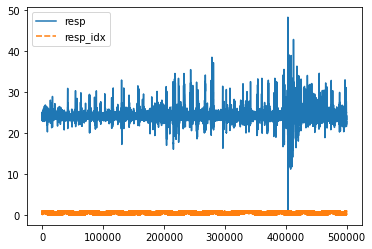

In [3]:
# sns.lineplot(data = df[['hrs']][500:750])
# sns.lineplot(data = df[['ecg', 'ecg_idx']][500:750])
sns.lineplot(data = df[['resp', 'resp_idx']][:])


# sns.lineplot(data = df[['ecg']][0:90000])
# sns.lineplot(data = df[['resp', 'resp_idx']][500:750])

In [4]:
from self_shared import *


# test the data
d = df[10000:101000].copy()

hr, rr = get_rate(d)
hrs = d.hrs.mean()

hr, hrs, rr


(154.24859589154016, 154.28046762802623, 57.81662269129288)

<AxesSubplot:xlabel='rr', ylabel='hr'>

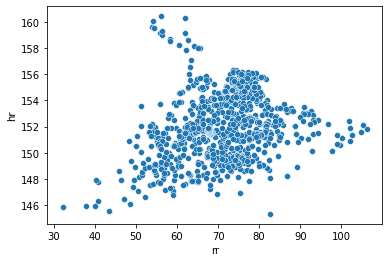

In [6]:
hr_list = []
rr_list = []
info = []

for j in range(10, 100):
    for i in range(10):
        mult = int(j*50)
        start = i*mult
        end = (i+1)*mult
        hr, rr = get_rate(df[start:end])
        hr_list.append(hr)
        rr_list.append(rr)
        info.append([i, j, start, end])

# dfr = pd.DataFrame({'hr': hr_list, 'rr': rr_list})
dfr = pd.DataFrame({'hr': hr_list, 'rr': rr_list, 'info': info})
dfr

sns.scatterplot(data=dfr, x='rr', y='hr')


                 hrs          ecg   ecg_idx         resp  resp_idx  \
count         482036       482036    482036       482036    482036   
mean      153.151946    -0.028322  0.050934    24.277997  0.018810   
std         8.740600     0.185441  0.219863     1.433232  0.135853   
min       120.000000    -3.207355  0.000000    12.930781  0.000000   
25%       148.514850    -0.117403  0.000000    23.605724  0.000000   
50%       153.061220    -0.043714  0.000000    24.174160  0.000000   
75%       157.894730     0.018735  0.000000    24.882093  0.000000   
max       185.185180     3.957986  1.000000    34.761078  1.000000   
nunique    45.000000  1790.000000  2.000000  5485.000000  2.000000   
count_na    0.000000     0.000000  0.000000     0.000000  0.000000   

                   time           id  
count            482036       482036  
mean      253755.626939   507.511327  
std       142001.015568   284.001755  
min         9214.000000    18.000000  
25%       130256.750000   261.0000

<AxesSubplot:>

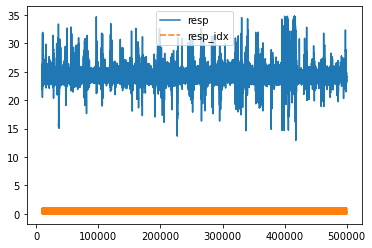

In [7]:


# test 
df = read_df(filenames=filenames, processed_dir=processed_dir)
# print descriptions of the df
describe_df(df)

df.head()

sns.lineplot(data = df[['resp', 'resp_idx']][:])


In [51]:
%matplotlib inline

import matplotlib.pylab as plt

import tsfresh
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

filtered_features = pd.read_csv(processed_dir+'tsfeatures.csv')
kind_to_fc_parameters = tsfresh.feature_extraction.settings.from_columns(filtered_features)


def gen_dfx(df):    
    dfx = extract_features(df[['id', 'time', 'resp']], column_id='id', column_sort='time',
                        kind_to_fc_parameters=kind_to_fc_parameters)

    dfx['id'] = dfx.index
    return dfx

In [9]:
def read_write(filenames, processed_dir, i, j):
    df = read_df(i, j)
    dfx = gen_dfx(df)
    dfr = gen_dfr(df)
    dfm = pd.merge(dfx, dfr, on=['id'], how='left')
    dfm = dfm.drop_duplicates()
    dfm = dfm.dropna()

    fullfilename = 'processed_'+filenames[i]+'_'+str(j)+'.csv'

    dfm.to_csv(processed_dir+fullfilename, index=False)


In [ ]:
# very long run time

df_stat = pd.read_csv(processed_dir+'stat.csv')

for i in range(len(filenames)):
    # set amount of row for each batch
    multiplier = 500000

    # find the maximum range for each
    n_batch = int(min(df_stat['sig_len_ecg'][i],
                  df_stat['sig_len_resp'][i])/multiplier)
    for j in range(n_batch):
        print("processing data for i = "+str(i)+", and j = "+str(j))
        try:
            read_write(i, j)
        except Exception as e:
            print(e)


In [ ]:
i = 0, j = 2
fullfilename = 'subsampled_'+filenames[i]+'_'+str(j)+'.csv'

dfm = pd.read_csv(processed_dir+fullfilename)

resp__range_count__max_1000000000000.0__min_0  \
1                                            499.0   
2                                            501.0   
3                                            499.0   
4                                            501.0   
5                                            499.0   
..                                             ...   
941                                          499.0   
942                                          501.0   
943                                          499.0   
944                                          501.0   
945                                          499.0   

     resp__index_mass_quantile__q_0.9  resp__index_mass_quantile__q_0.1  \
1                            0.901804                          0.104208   
2                            0.892216                          0.107784   
3                            0.891784                          0.106212   
4                            0.900200                          0.103792   
5                            0.899800                          0.102204   
..                                ...                               ...   
941                          0.901804                          0.100200   
942                          0.900200                          0.099800   
943                          0.901804                          0.100200   
944                          0.900200                          0.099800   
945                          0.901804                          0.100200   

     resp__index_mass_quantile__q_0.7  resp__index_mass_quantile__q_0.3  \
1                            0.703407                          0.300601   
2                            0.678643                          0.311377   
3                            0.687375                          0.308617   
4                            0.698603                          0.301397   
5                            0.703407                          0.302605   
..                                ...                               ...   
941                          0.701403                          0.302605   
942                          0.700599                          0.297405   
943                          0.701403                          0.302605   
944                          0.700599                          0.299401   
945                          0.701403                          0.300601   

     resp__index_mass_quantile__q_0.4  \
1                            0.398798   
2                            0.403194   
3                            0.400802   
4                            0.401198   
5                            0.404810   
..                                ...   
941                          0.402806   
942                          0.399202   
943                          0.400802   
944                          0.401198   
945                          0.400802   

     resp__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)  \
1                                             2.475780              
2                                             1.521865              
3                                             2.431795              
4                                             2.913809              
5                                             2.575001              
..                                                 ...              
941                                           2.275226              
942                                           3.222314              
943                                           2.105565              
944                                           1.102744              
945                                           3.378328              

     resp__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)  \
1                                             3.951920              
2                                             3.293720              
3                        

In [30]:
from fastai.tabular.all import *
#  import FillMissing, Categorify, Normalize, TabularList

data = dfm.copy()

col = data.columns.to_list()[:-1]

 
path = ''
splits = RandomSplitter(valid_pct=0.2)(range_of(data))

to = TabularPandas(data, 
                procs=[ Categorify, FillMissing, Normalize ],
                # cat_names = [],
                cont_names = col,
                y_names='hr',
                splits=splits)

dls = to.dataloaders(bs=64)
dls.show_batch()

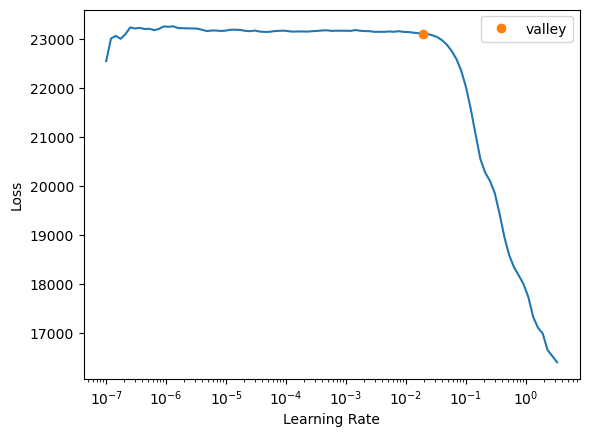

In [37]:
learn = tabular_learner(dls, metrics=[R2Score(), mse, mae])
learning_rate = learn.lr_find()

In [43]:
learn.fit_one_cycle(20, learning_rate)
learn.show_results()


RMSE :  4.716460
R2 :  0.727966


<AxesSubplot: xlabel='y_actual', ylabel='y_pred'>

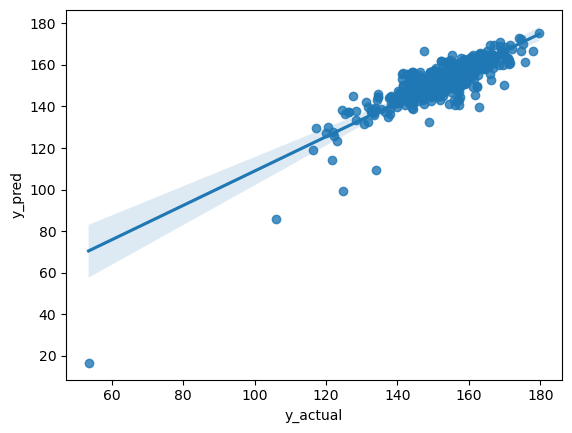

In [41]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


data = dfm
dl = learn.dls.test_dl(data)

pred, test_y = learn.get_preds(dl=dl)

# RMSE Computation
r_mse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(r_mse))

# r2square compution
r2 = r2_score(test_y, pred)
print("R2 : % f" %(r2))


y_actual = test_y.numpy().flatten()
y_pred = pred.numpy().flatten()

dft = pd.DataFrame({'y_actual':y_actual, 'y_pred': y_pred})

# dft = dft[dft['y_pred'] > 0]

sns.regplot(data=dft, x='y_actual', y='y_pred')

In [44]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
  
# Load the data
# dataset = dfr
# # drop = ['hrs', 'sig_min', 'sig_mean', 'sig_max' ]
# y_col = ['hrs']
# X, y =  dataset.drop(columns=y_col), dataset[y_col]

X, y = dfm.drop(columns=['hr']), dfm['hr']
  
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

# set objective
# obj = 'reg:linear' # deprecated, change to squarederror
obj = 'reg:squarederror'
# obj = 'reg:pseudohubererror'
  
# Instantiation
xgb_r = xg.XGBRegressor(objective = obj,
                  n_estimators = 1000, seed = 123)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

# r2square compution
r2 = r2_score(test_y, pred)
print("R2 : % f" %(r2))

c:\Users\hafiidz\anaconda3\envs\boost\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\hafiidz\anaconda3\envs\boost\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RMSE :  7.666199
R2 :  0.012126
